# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

You own an ice cream business an you would like to create a model that could predict the daily revenue in dollars based on the 
outside air temperature(degc).

Dataset:
    Input (x):Outside air temperature
    Output(y):Overall daily revenue generated in dollars.

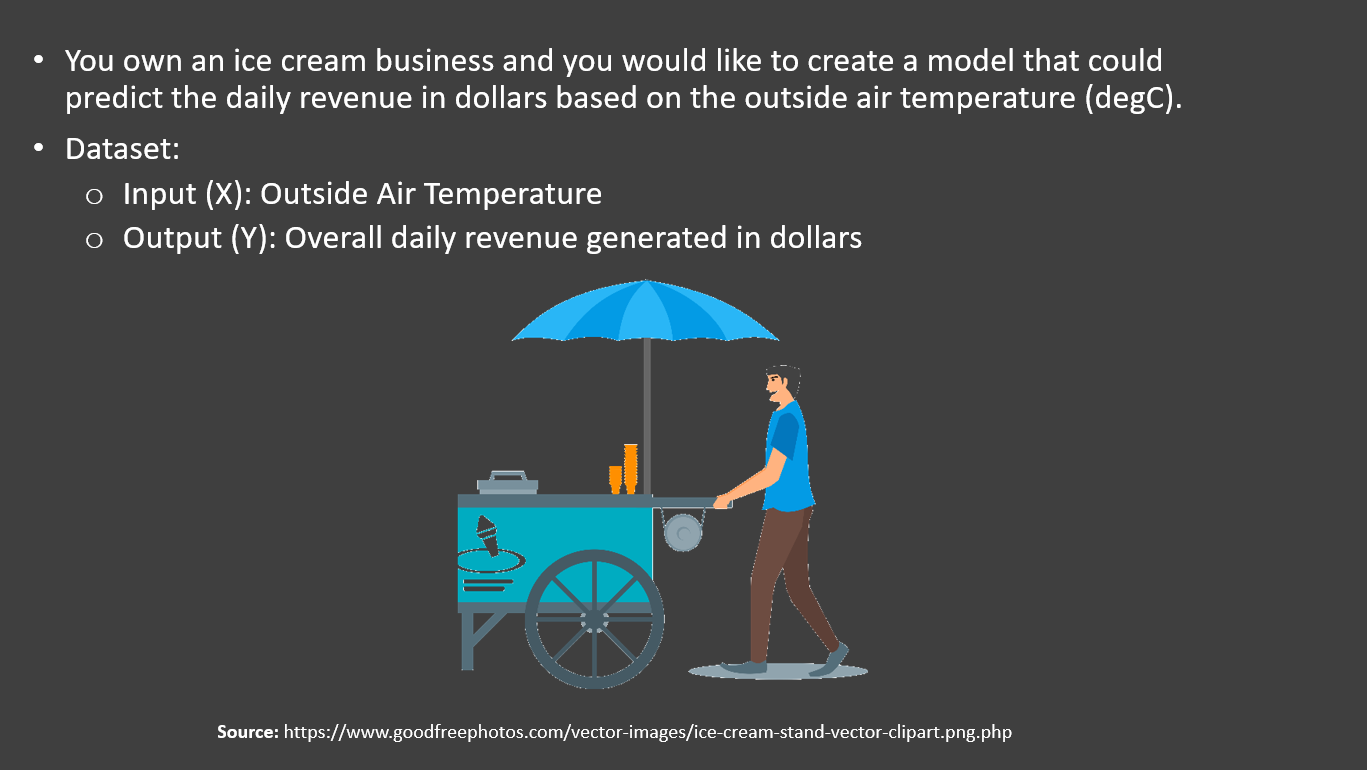

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True
             , grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [9]:
sales_df=pd.read_csv('IceCreamData.csv')

In [10]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [13]:
sales_df.head(3)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289


In [12]:
sales_df.tail(8)

,Temperature,Revenue
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [15]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [16]:
#Calculate the average and maximum temperature and revenue using an alternative method

In [22]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [23]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

# TASK #3: PERFORM DATA VISUALIZATION

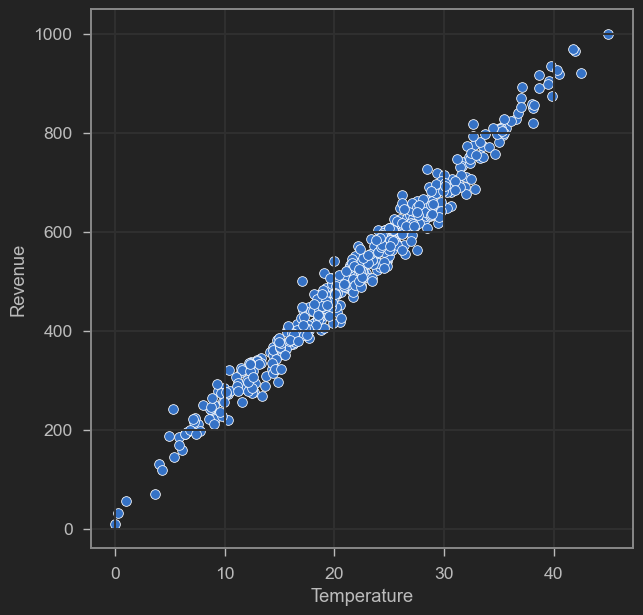

In [74]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()
plt.show()

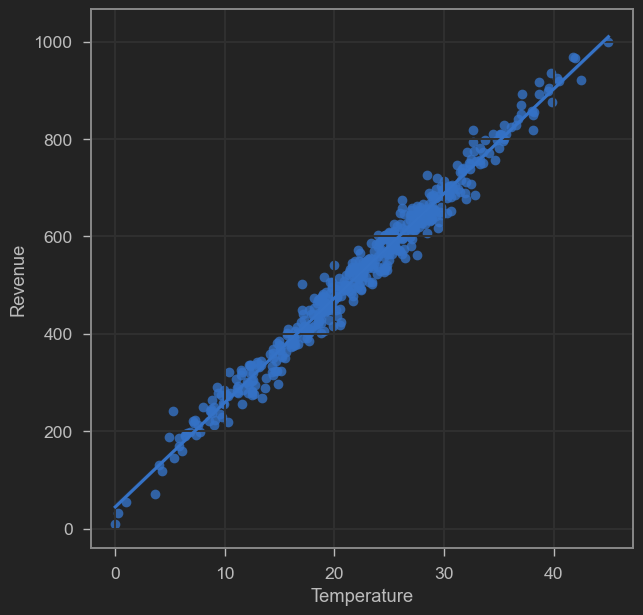

In [75]:
plt.figure(figsize=(7,7))
sns.regplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()
plt.show()

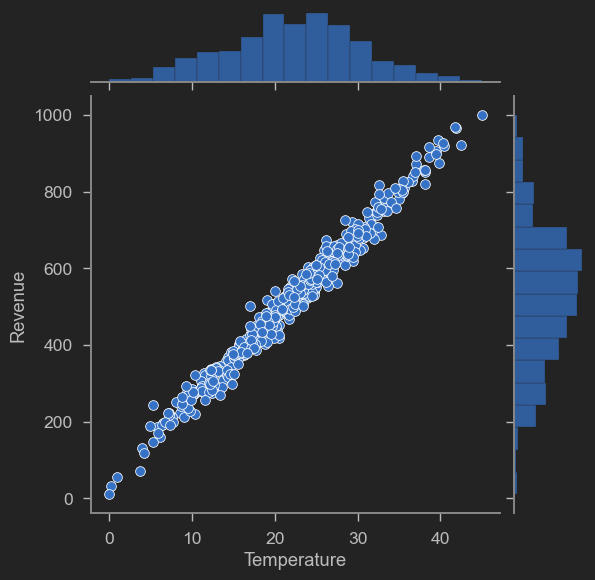

In [70]:
sns.jointplot(x='Temperature',y='Revenue',data=sales_df)

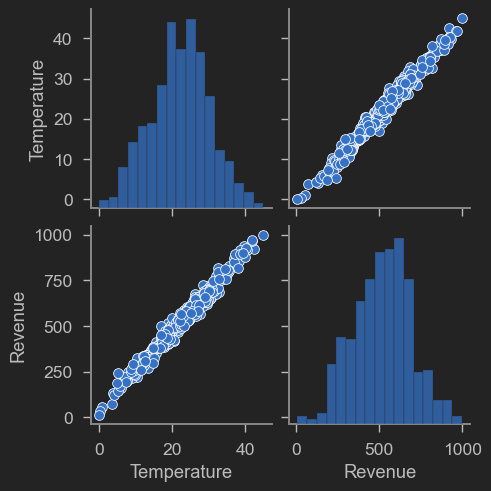

In [71]:
sns.pairplot(sales_df)

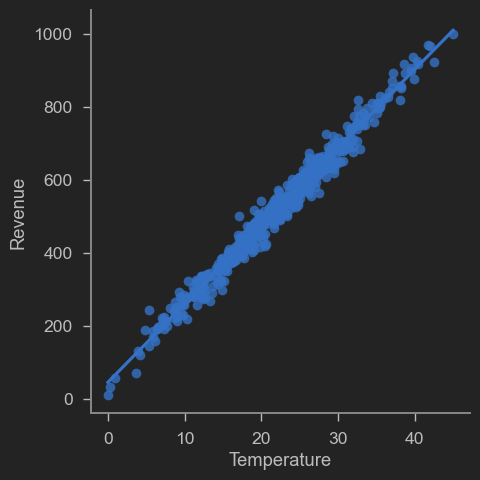

In [72]:
sns.lmplot(x='Temperature',y='Revenue',data=sales_df)

 # TASK #4: CREATE TESTING AND TRAINING DATASET

In [29]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [30]:
X=sales_df['Temperature']
y=sales_df['Revenue']

In [31]:
#converting dataframe to array
X=np.array(X)
y=np.array(y) 

In [32]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [34]:
X_train.shape

(400, 1)

In [35]:
X_test.shape

(100, 1)

In [36]:
y_train.shape

(400, 1)

In [37]:
y_test.shape

(100, 1)

# TASK #5: UNDERSTAND THEORY BEHIND SIMPLE LINER REGRESSION 

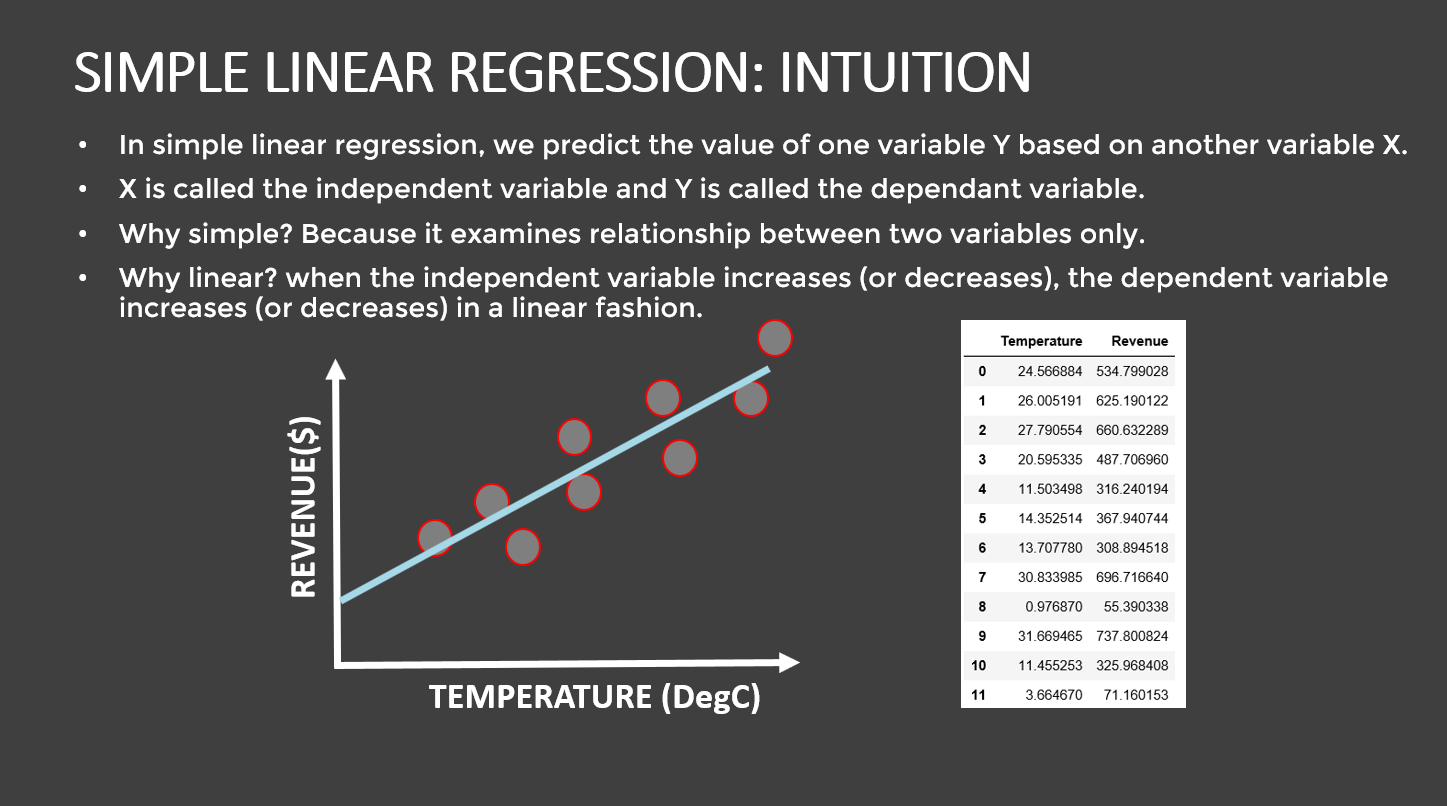

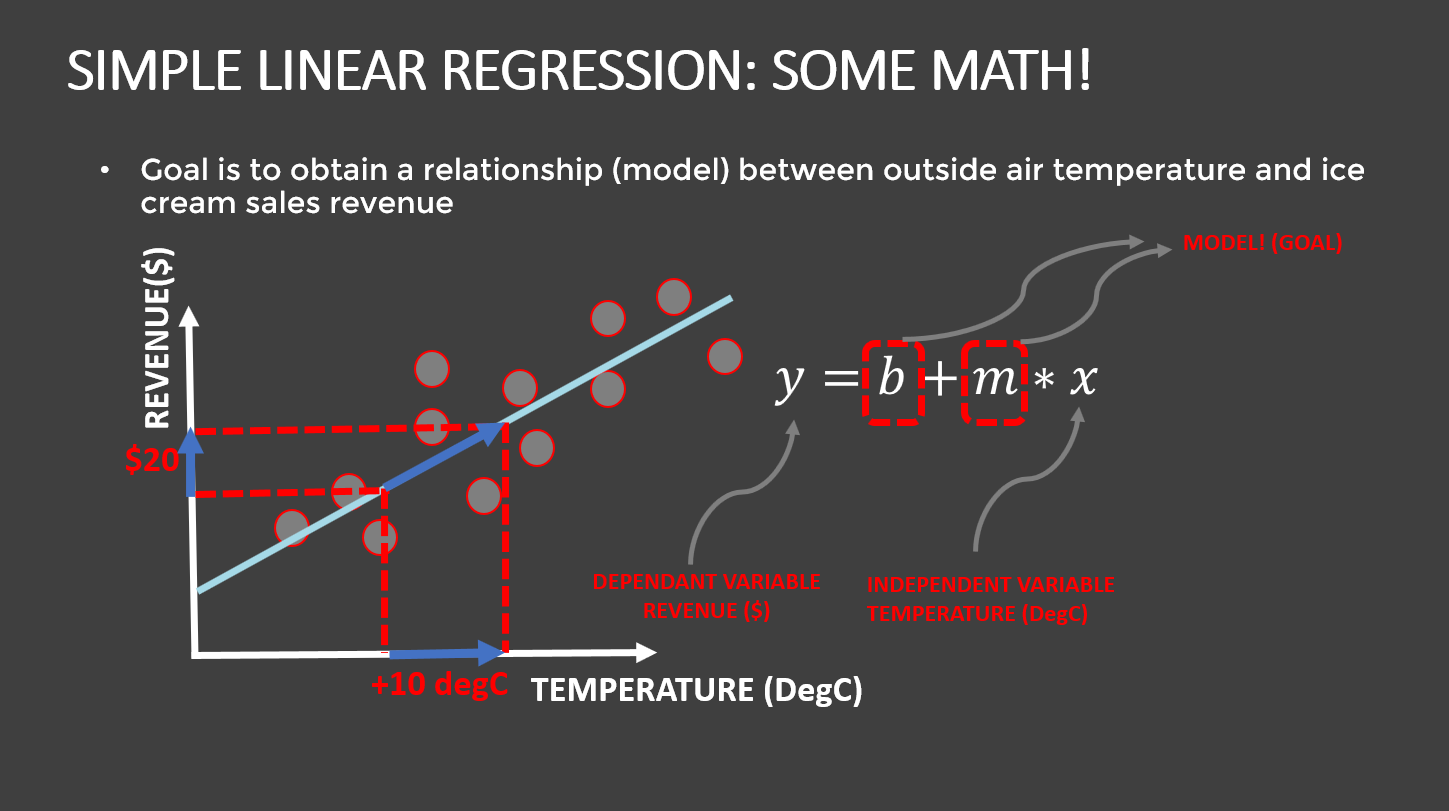

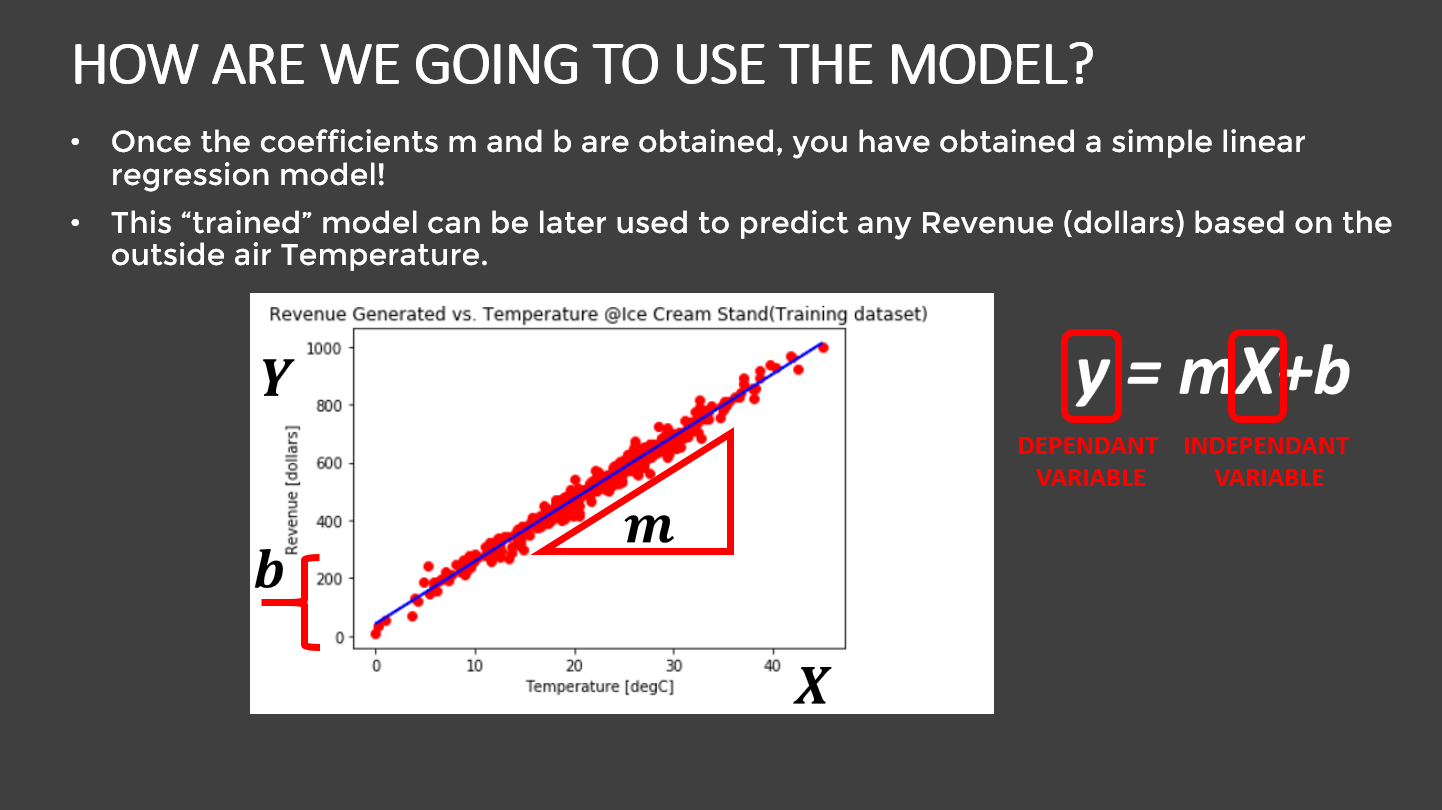

# TASK #6: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [56]:
from sklearn.linear_model import LinearRegression
simplelinearregression=LinearRegression(fit_intercept=True)# Fit_intercept=true indicates i dont care if the line pass through the origin

LinearRegression()

In [57]:
print('Linear Model Coeff(m)', simplelinearregression.coef_) # m is the slope in y=mx+b
print('Linear Model Coeff(b)', simplelinearregression.intercept_) #b is the y intercept in y=mx+b

Linear Model Coeff(m) [[21.45476244]]
Linear Model Coeff(b) [44.46580888]


In [58]:
Slr = LinearRegression(fit_intercept = False) # forcing the line to pass through the origin
Slr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [59]:
print('Linear Model Coeff(m)', Slr.coef_) 
print('Linear Model Coeff(b)', Slr.intercept_)

Linear Model Coeff(m) [[23.20142165]]
Linear Model Coeff(b) 0.0


# Task#7: TEST THE MODEL

In [78]:
y_predict=simplelinearregression.predict(X_test)
y_predict


array([[550.60571165],
       [ 44.46580888],
       [723.92664809],
       [570.57620509],
       [367.31542894],
       [495.16697152],
       [303.26335025],
       [390.87063001],
       [364.81771806],
       [862.88631647],
       [642.77714755],
       [364.07681217],
       [314.18465034],
       [453.53499214],
       [293.23598279],
       [438.0924598 ],
       [311.59547953],
       [596.3996605 ],
       [244.19560719],
       [292.68976535],
       [451.79037775],
       [686.37747288],
       [484.53811679],
       [579.75602126],
       [592.66073561],
       [468.29838234],
       [309.47677282],
       [587.98832002],
       [350.48668402],
       [695.19586963],
       [603.97179429],
       [530.05095526],
       [604.99811074],
       [635.09894549],
       [580.58854757],
       [655.05853884],
       [655.74982631],
       [129.99571641],
       [476.34053269],
       [588.86129092],
       [511.66359994],
       [359.54925935],
       [456.28892823],
       [640

In [69]:
y_test

array([[542.6080704],
       [ 10.       ],
       [737.8008241],
       [538.31289  ],
       [367.0523757],
       [503.0842679],
       [300.9322734],
       [395.2737497],
       [377.4309279],
       [850.2469822],
       [627.2912952],
       [384.6994155],
       [319.3494624],
       [406.516091 ],
       [257.078777 ],
       [410.860905 ],
       [279.866148 ],
       [621.9692088],
       [291.7230401],
       [321.8482734],
       [482.5719881],
       [696.6401775],
       [498.7570498],
       [607.5421478],
       [579.3073878],
       [493.7103332],
       [337.1190252],
       [581.2620157],
       [334.4337199],
       [691.9580059],
       [599.2782774],
       [546.6938576],
       [594.8724701],
       [661.4675188],
       [608.6299921],
       [726.2337713],
       [651.486741 ],
       [131.6570175],
       [477.2950539],
       [604.6266727],
       [534.6228653],
       [343.3629045],
       [463.0656143],
       [643.9443266],
       [414.423028 ],
       [68

# TASK #8: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

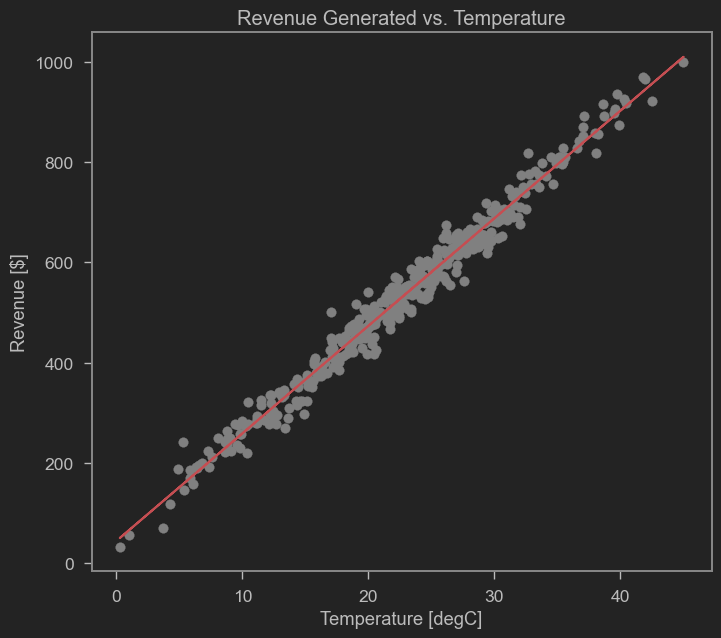

In [60]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,simplelinearregression.predict(X_train),color='r')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature')
plt.show()

In [61]:
accuracy_LinearRegression = simplelinearregression.score(X_test, y_test)
accuracy_LinearRegression

0.9813368512025159

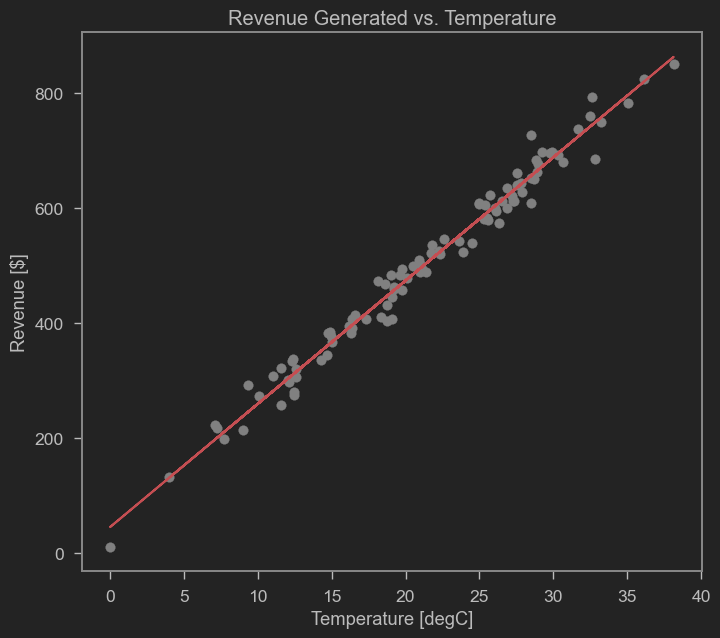

In [62]:
# Visualize on test data

plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,simplelinearregression.predict(X_test),color='r')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature')
plt.show()

In [63]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[464.02843306]]


In [64]:
# Use the trained model to generate predictions

Temp = np.array([5])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[116.00710826]]


In [65]:
# Use the trained model to generate predictions

Temp = np.array([40])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[928.05686611]]


In [66]:
# Use the trained model to generate predictions

Temp = np.array([-10])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[-232.01421653]]
